# Regresión Lineal  con Múltiples Variables de Entrada 


En este ejercicio, tu objetivo será implementar el método `forward` de un modelo de Regresión Lineal con múltiples variables de entrada y _una_ de salida. No debés implementar ningún otro método. La función se encuentra en la clase `RegresionLineal`. Luego, ejecuta las pruebas para verificar que implementaste correctamente el modelo.

In [1]:
import rnutil
import numpy as np

rnutil: Los archivos de los conjuntos de datos que ofrece este paquete también están disponibles en https://github.com/facundoq/redes-neuronales-util/tree/main/rnutil/data para descargar de forma individual
rnutil: Agregando el parámetro local=True en las funciones rnutil.load_dataset_numpy, rnutil.load_dataset_pandas y rnutil.load_image se puede cargar una versión local de un archivo en lugar de la versión que ofrece este paquete.


In [2]:
class RegresionLineal:
    '''
    Esta clase permite entrenar modelos de regresión lineal, cuya función de predicción es:
    y = x . w + b
    
    Los parámetros son:
    - w: un vector de flotantes de la misma dimensionalidad de x, es decir un vector de tamaño dx1
    - b (un flotante)
    La entrada x debe ser d dimensional, es decir, un vector de tamanio 1xd (o n de tamanño nxd).
    '''

    def __init__(self, w : np.ndarray, b : float):
        self.w = w
        self.b = b
    
    def __repr__(self):
        return f"{self.__class__.__name__}(w = {self.w}, b = {self.b:.5f})"

    def forward(self, x : np.ndarray):
        '''
        Debés implementar el forward del modelo.
        
        :param x: vector de d dimensiones y n ejemplos con los valores de entrada.
        :return: la predicción x * w  + b
        '''
        ### IMPLEMENTAR ####
        # Calcular la salida *y* en base a: 
        # x: valor de entrada
        # self.w: vector de pesos (variable de instancia, por eso el "self.")
        # self.b: sesgo o bias (variable de instancia, por eso el "self.")
        # Ejemplo
        # x = NxD = 5x3
        # w = 3x1
        # np.dot(a,b) : producto escalar
        # a @ b : mult de matrices
        # y = x * w + b
        # for i in range(n):
        #   xi = x[i,:]
        #   # xi : 1x3
        #   y[i] = 

        return np.dot(x, self.w) + self.b
    
    def backward(self,x:np.ndarray,y:np.ndarray)->(float,float):
        '''
        Calcula las derivadas de los parámetros del modelo con respecto 
        al error cuadrático medio y al conjunto de datos (x,y)
        No necesitas implementar nada aqui
        :param x: vector de d dimensiones y n ejemplos con los valores de entrada
        :param y: vector 1D con los n valores de salida _verdaderos_ 
        :return derivada del error respecto de w y b
        '''
        d=len(self.w)
        yhat = self.forward(x)
        # calculo de derivadas
        dEdw=np.zeros(d)
        for i in range(d):
            dEdw[i] = 2 * ((yhat - y)*x[:,i]).mean()
        dEdb = 2 * (yhat - y).mean()
        return dEdw,dEdb

    def fit(self,x:np.ndarray,y:np.ndarray,lr:float=0.001,epochs:int=100):
        '''
        No necesitas implementar nada aqui
        Entrena el modelo (ajusta los parámetros) para minimizar el error cuadrático medio
        Mediante descenso de gradiente
        :param x: vector de d dimensiones y n ejemplos con los valores de entrada
        :param y: vector 1D con los n valores de salida _verdaderos_ 
        :param alpha: velocidad de aprendizaje
        :param iterations: cantidad de iteraciones de aprendizaje
        '''
        
        assert (len(x.shape) == 2)
        assert (len(y.shape) == 1)
        assert ( len(y) == len(x))
        n = len(x)

        for i in range(epochs):
            dEdw,dEdb=self.backward(x,y)
            # actualizo los parámetros
            self.w = self.w - lr * dEdw # dEdw es un vector con tantos valores como w
            self.b = self.b - lr * dEdb
            print(f"Epoch {i+1}/{epochs} => Error = {self.error(x,y)}")
        
    def error(self,x:np.ndarray,y:np.ndarray)->float:
        '''
        Error cuadrático medio (MSE) del modelo
        No necesitas implementar nada aqui
        :param x: vector de d dimensiones y n ejemplos con los valores de entrada
        :param y: vector 1D con los n valores de salida _verdaderos_ 
        :return flotante con el error promedio del modelo entre todos los ejemplos
        '''
        
        yhat = self.forward(x)
        d2 = (y-yhat)**2
        return d2.mean()
    

In [3]:
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])

a + b

array([2, 4, 6])

# Ejecuta el siguiente bloque para verificar que la función `forward` está bien implementada. 

Si todos los valores son iguales, la implementación del `forward` debería estar bien realizada.

In [4]:
x = np.array([
    [1.0,2.0],
    [2.0,3.0],
    [3.0,4.0]
])

w1  = np.zeros(2) # [0,0]
rl1 = RegresionLineal(w1,0.0)
y   = rl1.forward(x)
rnutil.verificar_igualdad(y,np.zeros(3))


w2=np.ones(2)
rl2=RegresionLineal(w2,0.0)
y=rl2.forward(x)
rnutil.verificar_igualdad(y,np.array([3.0,5.0,7.0]))

w3=np.zeros(2)
rl3=RegresionLineal(w3,1.0)
y=rl3.forward(x)
rnutil.verificar_igualdad(y,np.ones(3))


w4=np.ones(2)
rl4=RegresionLineal(w4,1.0)
y=rl4.forward(x)
rnutil.verificar_igualdad(y,np.array([4.0,6.0,8.0]))


Los vectores x e y son iguales:
x:  [0. 0. 0.]
y:  [0. 0. 0.]
Los vectores x e y son iguales:
x:  [3. 5. 7.]
y:  [3. 5. 7.]
Los vectores x e y son iguales:
x:  [1. 1. 1.]
y:  [1. 1. 1.]
Los vectores x e y son iguales:
x:  [4. 6. 8.]
y:  [4. 6. 8.]


# Verifica que el modelo se entrena correctamente.

### Carga del dataset

In [5]:
data = rnutil.load_dataset_numpy("study_regression_2d_small.csv")

# Dividir en entradas y salidas
x, y = data[:,0:2], data[:,2]

# tamaño de los datos
# n= cant de ejemplos
# cant de dimensiones
n, d = x.shape

print("Si no implementaste el forward, el entrenamiento no funcionará correctamente.")

Loading file from package rnutil (/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/rnutil/data)...
Done
Si no implementaste el forward, el entrenamiento no funcionará correctamente.


### Creación del modelo inicial

In [6]:
print("Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados")
w_random = np.random.rand(d)
b_random = np.random.rand()

rl=RegresionLineal(w_random, b_random)

Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados


### Visualización del modelo inicial

Modelo inicial: RegresionLineal(w = [0.8506987  0.99489214], b = 0.99449). Error cuadrático medio: 403.4361


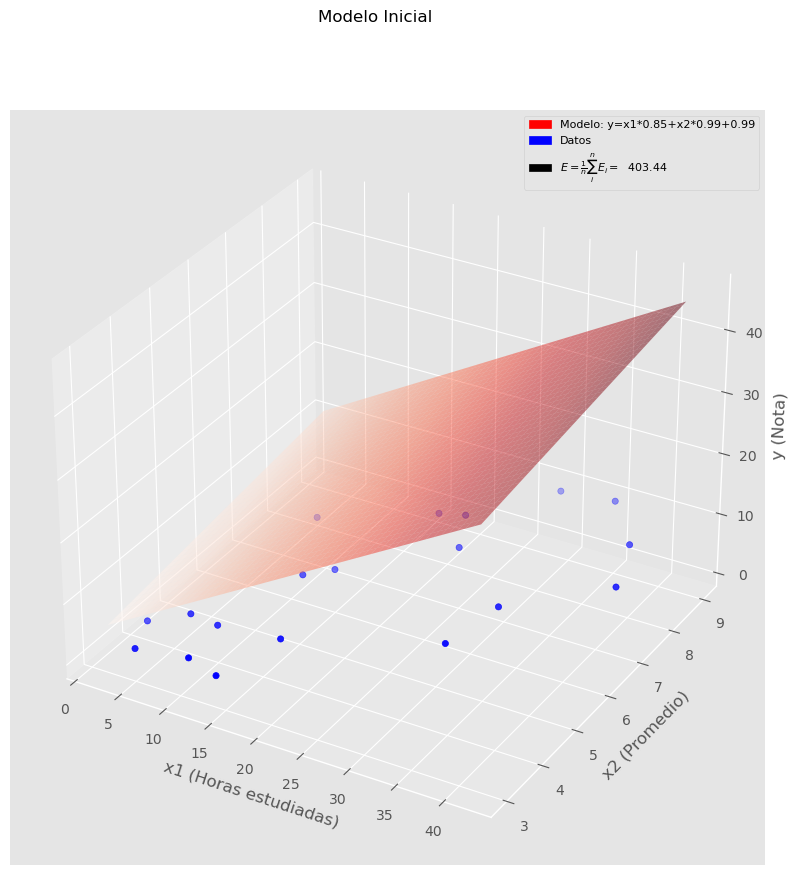

In [7]:
print(f"Modelo inicial: {rl}. Error cuadrático medio: {rl.error(x,y):.4f}")

rnutil.plot_regresion_lineal(
    rl.w,
    rl.b,
    x[:,0],
    x[:,1],
    y,
    "x1 (Horas estudiadas)","x2 (Promedio)","y (Nota)",
    title="Modelo Inicial"
)

### Entrenamiento del modelo

In [8]:
rl.fit(x, y, lr=0.001, epochs=100)

Epoch 1/100 => Error = 9.401413482000155
Epoch 2/100 => Error = 1.377579253478954
Epoch 3/100 => Error = 1.2043358341999066
Epoch 4/100 => Error = 1.19096405840378
Epoch 5/100 => Error = 1.1810518454298602
Epoch 6/100 => Error = 1.1714138064141952
Epoch 7/100 => Error = 1.1619808453539686
Epoch 8/100 => Error = 1.1527473341901122
Epoch 9/100 => Error = 1.1437090250094173
Epoch 10/100 => Error = 1.1348617854614214
Epoch 11/100 => Error = 1.126201571188319
Epoch 12/100 => Error = 1.117724423451436
Epoch 13/100 => Error = 1.109426467308502
Epoch 14/100 => Error = 1.1013039098396877
Epoch 15/100 => Error = 1.0933530384113965
Epoch 16/100 => Error = 1.0855702189768162
Epoch 17/100 => Error = 1.0779518944124358
Epoch 18/100 => Error = 1.0704945828897852
Epoch 19/100 => Error = 1.0631948762816272
Epoch 20/100 => Error = 1.0560494386019004
Epoch 21/100 => Error = 1.0490550044786733
Epoch 22/100 => Error = 1.042208377659427
Epoch 23/100 => Error = 1.035506429547978
Epoch 24/100 => Error = 1.028

### Visualiza el modelo y los datos

Modelo inicial: RegresionLineal(w = [0.08598519 0.6013912 ], b = 0.92005). Error cuadrático medio: 0.7848


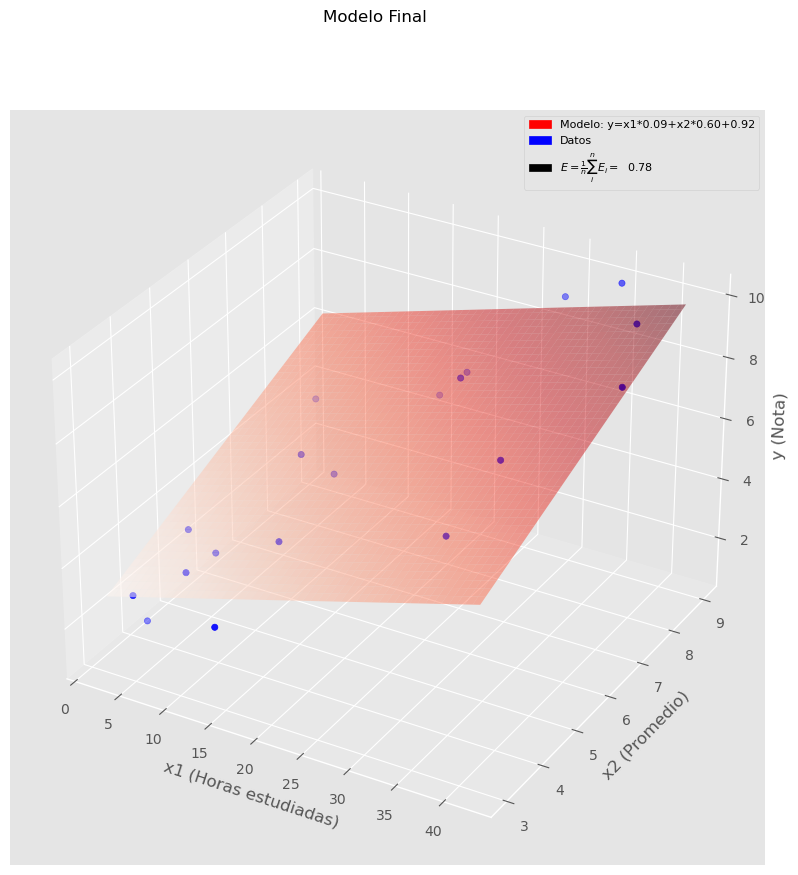

In [9]:
rnutil.plot_regresion_lineal(
    rl.w,
    rl.b,
    x[:,0],
    x[:,1],
    y,
    "x1 (Horas estudiadas)","x2 (Promedio)","y (Nota)",
    title="Modelo Final"
)

print(f"Modelo inicial: {rl}. Error cuadrático medio: {rl.error(x,y):.4f}")